# Sales Analysis

Source: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=WL&index=21&t=4554s&pp=gAQBiAQB

### Import Necessary Libraries

In [198]:
# import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)


### Merging the 12 months of sales data into a single CSV file


In [199]:
# create an empty dataframe to store all data
all_months_data = pd.DataFrame()

# loop through the file names in the folder "Sales_Data"
files = [file for file in os.listdir('./Sales_Data')]

# read through all the csv file in the folder "Sales_Data"
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

# create a csv file with the dataframe "all_months_data"
all_months_data.to_csv("all_data.csv", index=False)


In [200]:
# Read in updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning & Preparation

In [201]:
# return rows with NaN values in any column
rows_with_nans = all_data[all_data.isnull().any(axis=1)]
rows_with_nans.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# dropping NaN Values, only when all values in a row is NaN
all_data =  all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [203]:
'''
i tried to store the month as Integer but ran into an error NaN values cannot be converted into INT
the following code return 355 before data cleaning
'''
'''
# there are still 355 NaN , hence cannot be parsed into INT in "Month"
date_parsed_nan = all_data['Date Parsed'].isna().sum()
print(date_parsed_nan)
'''

'''
the reason why the value in Date Parsed in NaT because there are 355 rows storing the column name as value
e.g, the 519th rows is as follows:
519 Order ID  Product  Quantity Ordered  Price Each  Order Date Purchase Address NaT
this is confirmed by running the code below, it also returned 355
'''
count = len(all_data[all_data['Order ID'] == 'Order ID'])
print(count)

# removing rows storing the column name as value
all_data = all_data[all_data['Order ID'] != 'Order ID']


355


#### Change "Order Date" to datetime dtype

In [204]:
# parse "Order Date" to datetime format in "Date Parsed". use infer_datetime_format as the data is stored in different format
all_data['Date Parsed'] = pd.to_datetime(all_data['Order Date'], infer_datetime_format=True, errors='coerce')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00


### Augment Data with Addtional Columns

#### Add Month Column

In [205]:
# extract month from "Date Parsed"
all_data['Month'] = all_data['Date Parsed'].dt.month.astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4


#### Add Hour & Minute Columns

In [206]:
# extract month from "Date Parsed"
all_data['Hour'] = all_data['Date Parsed'].dt.hour.astype(int)
all_data['Minute'] = all_data['Date Parsed'].dt.minute.astype(int)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,22,30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,9,27


#### Add Sales Column

In [207]:
# convert columns to the right data type (convert to int & float respectively)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month,Hour,Minute,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,22,30,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,9,27,11.99


#### Add City Column

In [208]:
# split the "purchase address" column by "," and get the string between the two commas
def get_city(address):
    return address.split(',')[1]

# split by comma and get the last piece, split again by space and get the second element 
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# f-string is used for formatting text
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month,Hour,Minute,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,8,46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,22,30,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,9,27,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned in that month?


In [209]:
# numeric_only: include only float/int/boolean columns
# return a Dataframe
sales_result_month = all_data.groupby('Month').sum(numeric_only=True)
print(sales_result_month)

       Quantity Ordered  Price Each    Hour  Minute       Sales
Month                                                          
1                 10903  1811768.38  139485  282440  1822256.73
2                 13449  2188884.72  172669  354885  2202022.42
3                 17005  2791207.83  218969  447559  2807100.38
4                 20558  3367671.02  262259  544186  3390670.24
5                 18667  3135125.13  238780  487899  3152606.75
6                 15253  2562025.61  195528  402436  2577802.26
7                 16072  2632539.56  206169  417349  2647775.76
8                 13448  2230345.42  172289  353857  2244467.88
9                 13109  2084992.09  168513  341698  2097560.13
10                22703  3715554.83  290650  598437  3736726.88
11                19798  3180600.68  254865  518231  3199603.20
12                28114  4588415.41  359978  733082  4613443.34


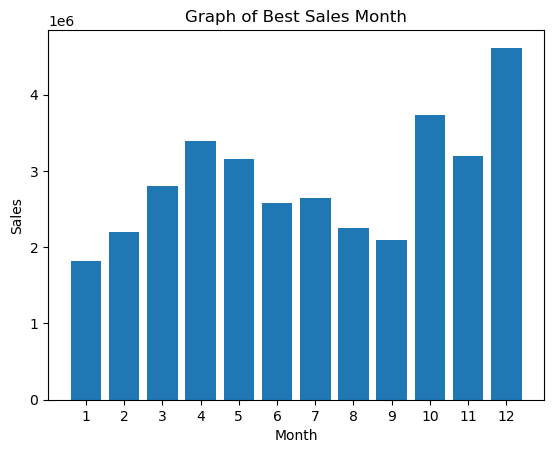

In [210]:
# creating the bar plot
plt.bar(sales_result_month.index, sales_result_month['Sales'])
 
#xticks to display all x label
plt.xticks(sales_result_month.index)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Graph of Best Sales Month")
plt.show()

### Question 2: What city had the highest number of sales?


In [211]:
# numeric_only: include only float/int/boolean columns
# return a Series
sales_result_city = all_data.groupby('City')['Sales'].sum(numeric_only=True)
print(sales_result_city)

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64


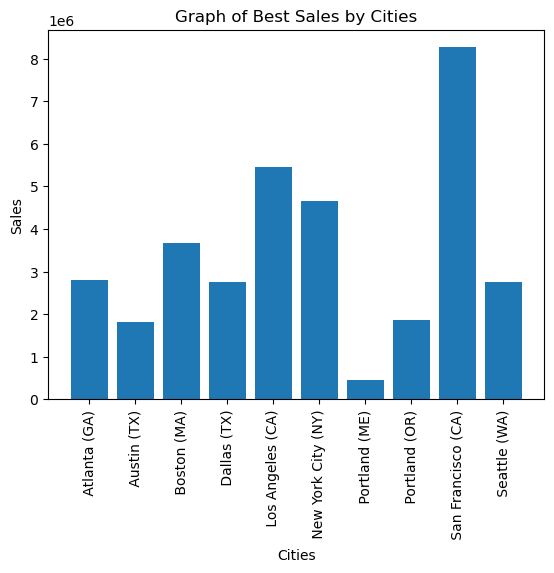

In [212]:
# creating the bar plot
plt.bar(sales_result_city.index, sales_result_city)
 
#xticks to display all x label
plt.xticks(sales_result_city.index, rotation='vertical')
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Graph of Best Sales by Cities")
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customers' buying product?

In [213]:
# count the occurrence of hour value (0~23)
hour_occurrence = all_data.groupby('Hour').size()
print(hour_occurrence)

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64


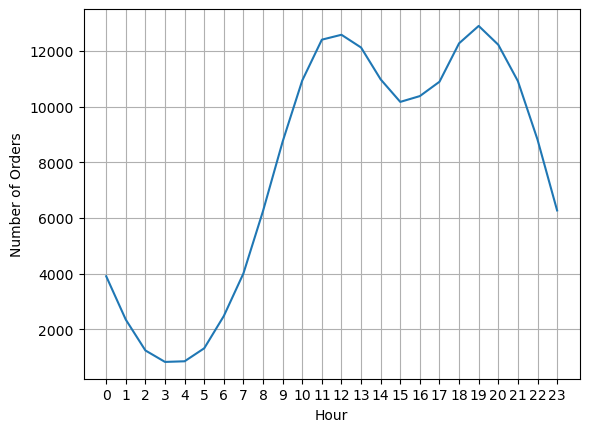

In [214]:
# lineplot: x = hour, y=hour occurrence
plt.plot(hour_occurrence.index, hour_occurrence)
plt.xticks(hour_occurrence.index)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [215]:
# keep rows with duplicated Order ID values, keep=False: Mark all duplicates as True
df_duplicate_rows = all_data[all_data.duplicated(subset='Order ID', keep=False)]

df_duplicate_rows.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month,Hour,Minute,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,11.99,Los Angeles (CA)
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,19,42,600.00,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,19,42,11.95,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,11,31,99.99,Boston (MA)
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,11,31,99.99,Boston (MA)
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,4,17,0,5.98,San Francisco (CA)
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,4,17,0,600.00,San Francisco (CA)
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,4,11,7,14.95,New York City (NY)
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,4,11,7,11.95,New York City (NY)


In [216]:
# create new column "Grouped" which joins the values in "Product" column with the same Order ID
df_duplicate_rows['Grouped'] = df_duplicate_rows.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_duplicate_rows.head(20)


C:\Users\Jeff\AppData\Local\Temp\ipykernel_2968\632944741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate_rows['Grouped'] = df_duplicate_rows.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date Parsed,Month,Hour,Minute,Sales,City,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,14,38,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,19,42,600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,19,42,11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,11,31,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,11,31,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,4,17,0,5.98,San Francisco (CA),"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",2019-04-10 17:00:00,4,17,0,600.00,San Francisco (CA),"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,4,11,7,14.95,New York City (NY),"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",2019-04-12 11:07:00,4,11,7,11.95,New York City (NY),"Lightning Charging Cable,USB-C Charging Cable"


In [217]:
# takes only the "Order ID" & "Grouped" columns, drop duplicating rows and assign it back to "df_duplicate_rows"
df_duplicate_rows = df_duplicate_rows[['Order ID', 'Grouped']].drop_duplicates()
df_duplicate_rows.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [218]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_duplicate_rows['Grouped']:
    row_list = row.split(',')
    # 2: most common pair, if set to 3: most common 3
    count.update(Counter(combinations(row_list, 2)))

# return top 10 most common pairs
# print(count.most_common(10))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most?

In [219]:
# calculate quantity of products sold
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
print(product_quantity)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


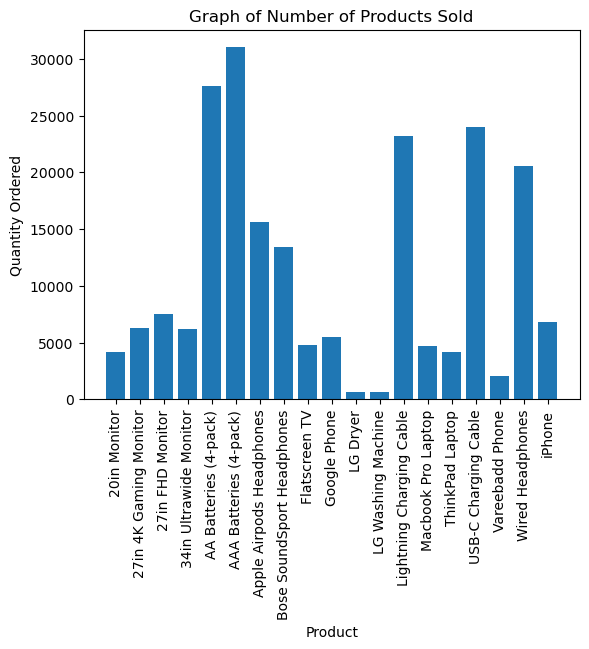

In [220]:
# creating the bar plot
plt.bar(product_quantity.index, product_quantity)
 
#xticks to display all x label
plt.xticks(product_quantity.index, rotation='vertical')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Graph of Number of Products Sold")
plt.show()

In [221]:
# get prices of products
product_prices = all_data.groupby('Product').mean()['Price Each']
print(product_prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Jeff\AppData\Local\Temp\ipykernel_2968\2107418056.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_prices = all_data.groupby('Product').mean()['Price Each']


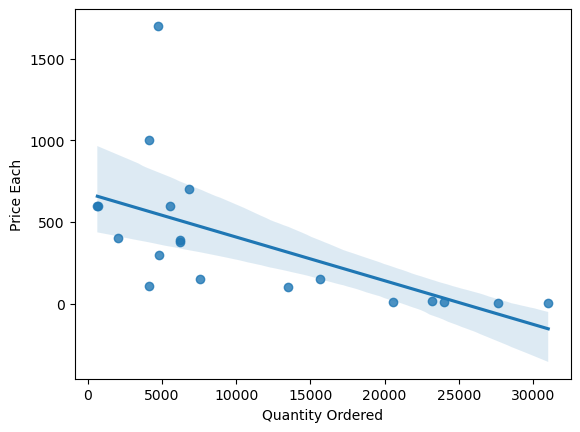

In [222]:
# scatterplot & regression line to describe the relationship between product quantity sold & product prices
sns.regplot(x=product_quantity, y=product_prices)
plt.show()

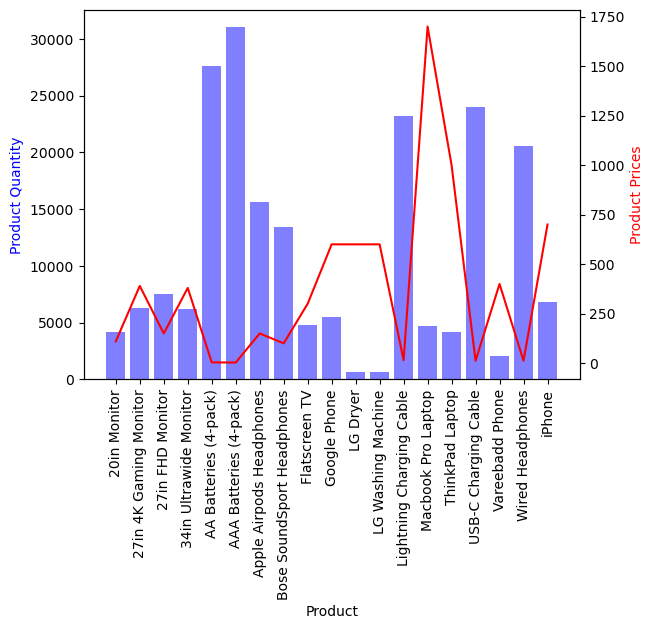

In [223]:
# Reference: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
# subplot: x = product name, y1 = product quantity sold, y2 = product prices
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_quantity.index, product_quantity, color='b', alpha=0.5)
ax2.plot(product_prices.index, product_prices, 'r')

ax1.set_xlabel('Product')
ax1.set_ylabel('Product Quantity', color='b')
ax2.set_ylabel('Product Prices', color='r')
# set the x-axis tick locations and labels
ax1.set_xticks(range(len(product_quantity.index)))
ax1.set_xticklabels(product_quantity.index, rotation='vertical')

plt.show()

Insight: Both the graphs above show the higher the product prices, the less likely the product is sold.